In [6]:
from google.colab import files
uploaded = files.upload()

Saving ML_Materials.zip to ML_Materials.zip


In [7]:
import zipfile

# ZIP dosyasını açma
zip_path = '/content/ML_Materials.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()  # İçerikleri listeleme

File Name                                             Modified             Size
Kurs Materyalleri(Makine O╠êg╠årenmesi)/       2024-03-23 21:01:18            0
__MACOSX/._Kurs Materyalleri(Makine O╠êg╠årenmesi) 2024-03-23 21:01:18          212
Kurs Materyalleri(Makine O╠êg╠årenmesi)/cart.py 2021-07-19 21:32:38        12884
__MACOSX/Kurs Materyalleri(Makine O╠êg╠årenmesi)/._cart.py 2021-07-19 21:32:38          212
Kurs Materyalleri(Makine O╠êg╠årenmesi)/.DS_Store 2021-12-18 18:48:58         6148
__MACOSX/Kurs Materyalleri(Makine O╠êg╠årenmesi)/._.DS_Store 2021-12-18 18:48:58          212
Kurs Materyalleri(Makine O╠êg╠årenmesi)/diabetes_pipeline.py 2021-07-22 17:55:44         9324
__MACOSX/Kurs Materyalleri(Makine O╠êg╠årenmesi)/._diabetes_pipeline.py 2021-07-22 17:55:44          268
Kurs Materyalleri(Makine O╠êg╠årenmesi)/datasets/ 2024-03-23 21:01:18            0
__MACOSX/Kurs Materyalleri(Makine O╠êg╠årenmesi)/._datasets 2024-03-23 21:01:18          212
Kurs Materyalleri(Makine O╠êg╠å

In [8]:
import zipfile
import os

zip_path = '/content/ML_Materials.zip'
extract_path = '/content/ML_Materials/'

# ZIP dosyasını aç ve içeriği çıkar
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extract('Kurs Materyalleri(Makine O╠êg╠årenmesi)/datasets/diabetes.csv', extract_path)

# Çıkarılan dosyanın yolunu görüntüle
extracted_file = os.path.join(extract_path, 'Kurs Materyalleri(Makine O╠êg╠årenmesi)/datasets/diabetes.csv')
extracted_file


'/content/ML_Materials/Kurs Materyalleri(Makine O╠êg╠årenmesi)/datasets/diabetes.csv'

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action="ignore")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [10]:
df = pd.read_csv("/content/ML_Materials/Kurs Materyalleri(Makine O╠êg╠årenmesi)/datasets/churn.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 49.3+ KB


In [16]:
if "TotalCharges" not in df.columns:
    print("TotalCharges sütunu bulunamadı, yerine Total_Purchase kullanılacak.")
    df["TotalCharges"] = df["Total_Purchase"]

TotalCharges sütunu bulunamadı, yerine Total_Purchase kullanılacak.


In [17]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [18]:
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [25]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    # Sadece sayısal sütunlarla çalışıyoruz
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    print(dataframe[numeric_columns].quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [30]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")

    # Sadece sayısal sütunlar üzerinde çalışılacak
    numeric_columns = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    print(dataframe[numeric_columns].quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [33]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")


In [40]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")

    # Num_cols listesi sayısal sütunları içeriyor
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    print(dataframe[num_cols].quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


Summary for: Age
count   900.000
mean     41.817
std       6.128
min      22.000
25%      38.000
50%      42.000
75%      46.000
max      65.000
Name: Age, dtype: float64




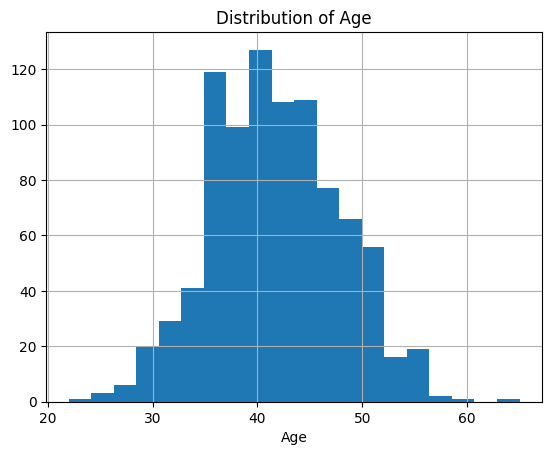

Summary for: Total_Purchase
count     900.000
mean    10062.824
std      2408.645
min       100.000
25%      8497.123
50%     10045.870
75%     11760.105
max     18026.010
Name: Total_Purchase, dtype: float64




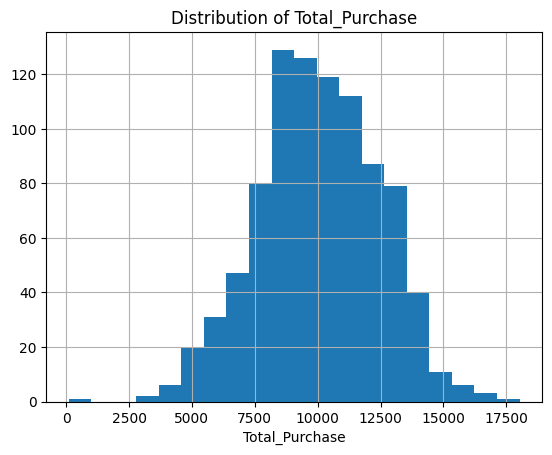

Summary for: Account_Manager
count   900.000
mean      0.481
std       0.500
min       0.000
25%       0.000
50%       0.000
75%       1.000
max       1.000
Name: Account_Manager, dtype: float64




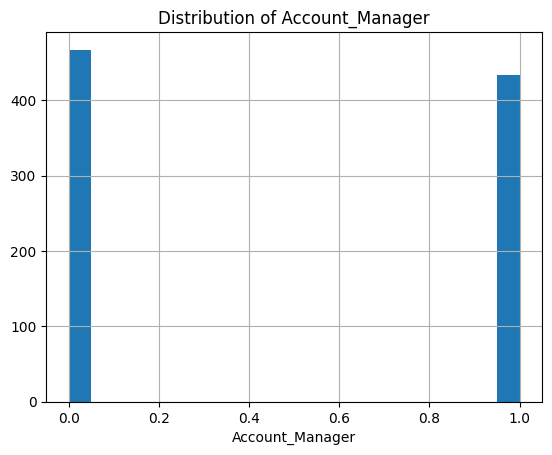

Summary for: Years
count   900.000
mean      5.273
std       1.274
min       1.000
25%       4.450
50%       5.215
75%       6.110
max       9.150
Name: Years, dtype: float64




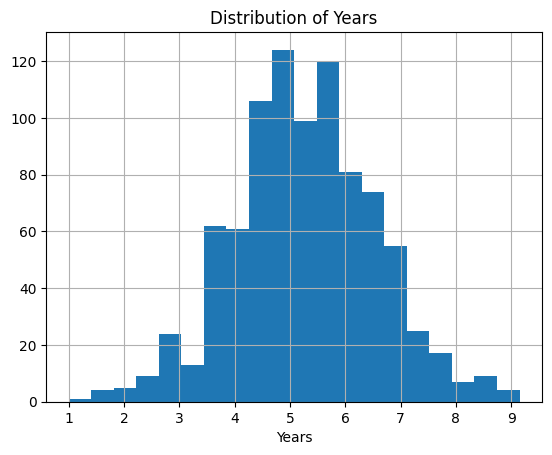

Summary for: Num_Sites
count   900.000
mean      8.588
std       1.765
min       3.000
25%       7.000
50%       8.000
75%      10.000
max      14.000
Name: Num_Sites, dtype: float64




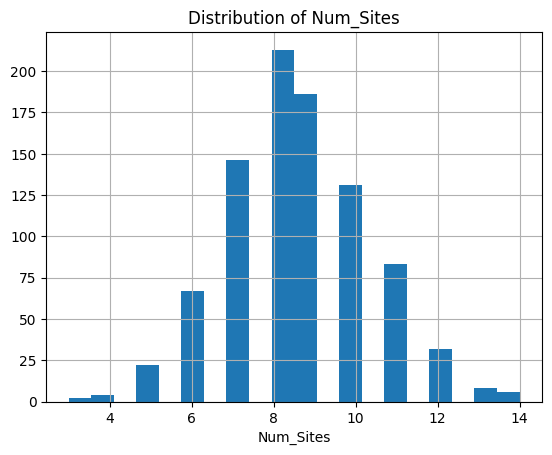

Summary for: Churn
count   900.000
mean      0.000
std       0.000
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       0.000
Name: Churn, dtype: float64




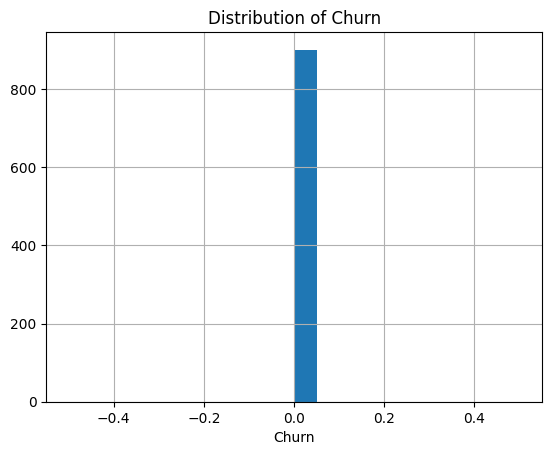

Summary for: TotalCharges
count     900.000
mean    10062.824
std      2408.645
min       100.000
25%      8497.123
50%     10045.870
75%     11760.105
max     18026.010
Name: TotalCharges, dtype: float64




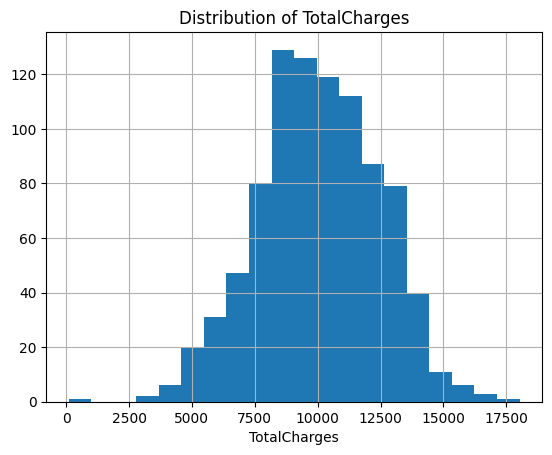

In [37]:
# Num_cols listesini tanımlayın
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

# Num_summary fonksiyonunu tanımlayın
def num_summary(dataframe, numerical_col, plot=False):
    print(f"Summary for: {numerical_col}")
    print(dataframe[numerical_col].describe())
    print("\n")

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(f"Distribution of {numerical_col}")
        plt.show()

# Num_cols içindeki her sütun için num_summary çağrısı
for col in num_cols:
    num_summary(df, col, plot=True)


In [44]:
  # Veri çerçevesindeki kategorik ve sayısal sütunları ayıran fonksiyon
def grab_col_names(dataframe):
    # Kategorik sütunları belirleyin
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    # Sayısal sütunları belirleyin
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    # Kategorik fakat sayısal görünen sütunları filtreleyin
    num_but_cat = [col for col in num_cols if dataframe[col].nunique() < 10]

    # Kategorik ama sayısal olmayan sütunları filtreleyin
    cat_but_car = [col for col in cat_cols if dataframe[col].nunique() > 20]

    # Sayısal ama kategorik olabilecek sütunları çıkartın
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

# Fonksiyonu çalıştırma
cat_cols, num_cols, cat_but_car = grab_col_names(df)

# Sonuçları inceleme
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)
print("Categorical but cardinal columns:", cat_but_car)


Observations: 900
Variables: 8
cat_cols: 1
num_cols: 5
cat_but_car: 1
num_but_cat: 2
Categorical columns: ['Names']
Numerical columns: ['Age', 'Total_Purchase', 'Years', 'Num_Sites', 'TotalCharges']
Categorical but cardinal columns: ['Names']


In [45]:
# KATEGORİK DEĞİŞKENLERİN ANALİZİ

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)

                       Names  Ratio
Names                              
Jennifer Wood              2  0.222
Cameron Williams           1  0.111
Stacy Marshall             1  0.111
Christopher Clark          1  0.111
Rose White                 1  0.111
Derek Martinez             1  0.111
Wendy Key                  1  0.111
Lisa Fisher                1  0.111
Kyle Hinton                1  0.111
Travis Howell              1  0.111
Vanessa Donaldson          1  0.111
Kathy Robertson            1  0.111
Katie Nichols              1  0.111
Shannon Miller             1  0.111
Heather Little             1  0.111
Mary Marshall              1  0.111
Jose Rowland               1  0.111
Brittany Martinez          1  0.111
Charles Ellison            1  0.111
Dr. Kathleen Wiley         1  0.111
Justin Roman PhD           1  0.111
Daniel Todd                1  0.111
Eugene Robertson           1  0.111
Frank Chase                1  0.111
Nancy Martin               1  0.111
Duane Mcdonald             1

count   900.000
mean     41.817
std       6.128
min      22.000
5%       32.000
10%      34.000
20%      37.000
30%      38.700
40%      40.000
50%      42.000
60%      43.000
70%      45.000
80%      47.000
90%      50.000
95%      52.000
99%      55.010
max      65.000
Name: Age, dtype: float64


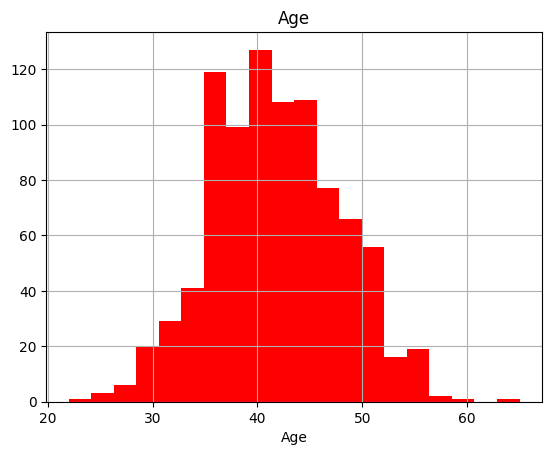

count     900.000
mean    10062.824
std      2408.645
min       100.000
5%       6080.707
10%      6852.109
20%      8092.934
30%      8797.008
40%      9402.944
50%     10045.870
60%     10675.296
70%     11431.908
80%     12219.838
90%     13124.127
95%     13769.500
99%     15423.899
max     18026.010
Name: Total_Purchase, dtype: float64


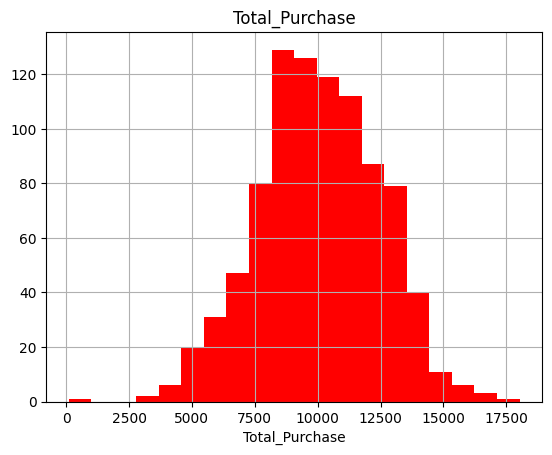

count   900.000
mean      5.273
std       1.274
min       1.000
5%        3.157
10%       3.718
20%       4.260
30%       4.610
40%       4.950
50%       5.215
60%       5.580
70%       5.900
80%       6.350
90%       6.890
95%       7.350
99%       8.361
max       9.150
Name: Years, dtype: float64


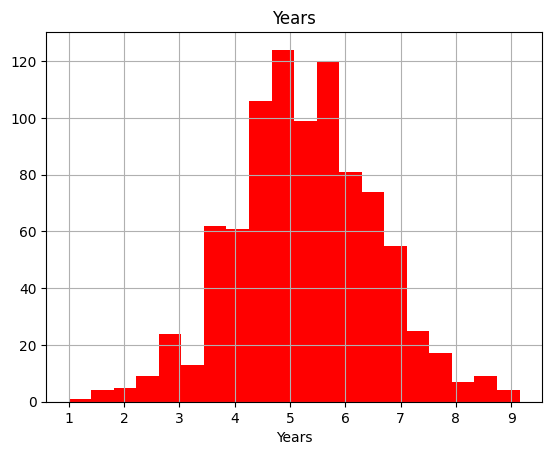

count   900.000
mean      8.588
std       1.765
min       3.000
5%        6.000
10%       6.000
20%       7.000
30%       8.000
40%       8.000
50%       8.000
60%       9.000
70%       9.000
80%      10.000
90%      11.000
95%      12.000
99%      13.000
max      14.000
Name: Num_Sites, dtype: float64


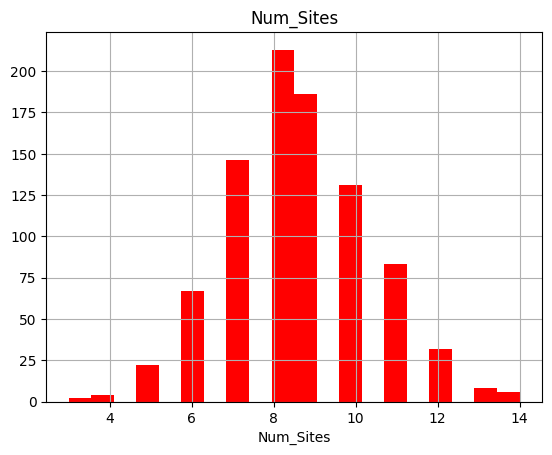

count     900.000
mean    10062.824
std      2408.645
min       100.000
5%       6080.707
10%      6852.109
20%      8092.934
30%      8797.008
40%      9402.944
50%     10045.870
60%     10675.296
70%     11431.908
80%     12219.838
90%     13124.127
95%     13769.500
99%     15423.899
max     18026.010
Name: TotalCharges, dtype: float64


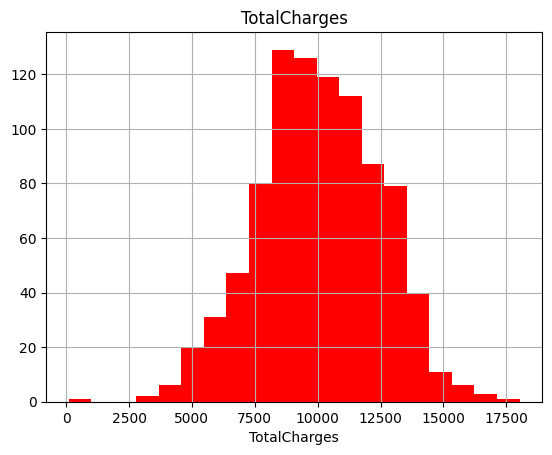

In [47]:
# NUMERİK DEĞİŞKENLERİN ANALİZİ

import matplotlib.pyplot as plt

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20, color='red')
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

# NumCols üzerinden döngü başlatın
for col in num_cols:
    num_summary(df, col, plot=True)


In [52]:
# NUMERİK DEĞİŞKENLERİN TARGET GÖRE ANALİZİ


def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)



         Age
Churn       
0     41.817


       Total_Purchase
Churn                
0           10062.824


       Years
Churn       
0      5.273


       Num_Sites
Churn           
0          8.588


       TotalCharges
Churn              
0         10062.824




In [54]:
# KATEGORİK DEĞİŞKENLERİN TARGET GÖRE ANALİZİ

def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)



Names
                       TARGET_MEAN  Count  Ratio
Names                                           
Aaron King                   0.000      1  0.111
Aaron Meyer                  0.000      1  0.111
Aaron West                   0.000      1  0.111
Abigail Gonzalez             0.000      1  0.111
Abigail Jennings             0.000      1  0.111
Adam Gomez                   0.000      1  0.111
Adam Harris                  0.000      1  0.111
Adam Moore                   0.000      1  0.111
Adam Porter                  0.000      1  0.111
Adam Strong                  0.000      1  0.111
Adam Waters                  0.000      1  0.111
Adriana James                0.000      1  0.111
Alan Gray                    0.000      1  0.111
Albert Clayton               0.000      1  0.111
Alex Banks                   0.000      1  0.111
Alexandra Phillips           0.000      1  0.111
Alexis Allen                 0.000      1  0.111
Alexis Hill                  0.000      1  0.111
Allison Clark 

In [55]:
# KORELASYON
df[num_cols].corr()

,Age,Total_Purchase,Years,Num_Sites,TotalCharges
Age,1.000,-0.037,0.006,-0.006,-0.037
Total_Purchase,-0.037,1.000,-0.006,-0.003,1.000
Years,0.006,-0.006,1.000,0.052,-0.006
Num_Sites,-0.006,-0.003,0.052,1.000,-0.003
TotalCharges,-0.037,1.000,-0.006,-0.003,1.000


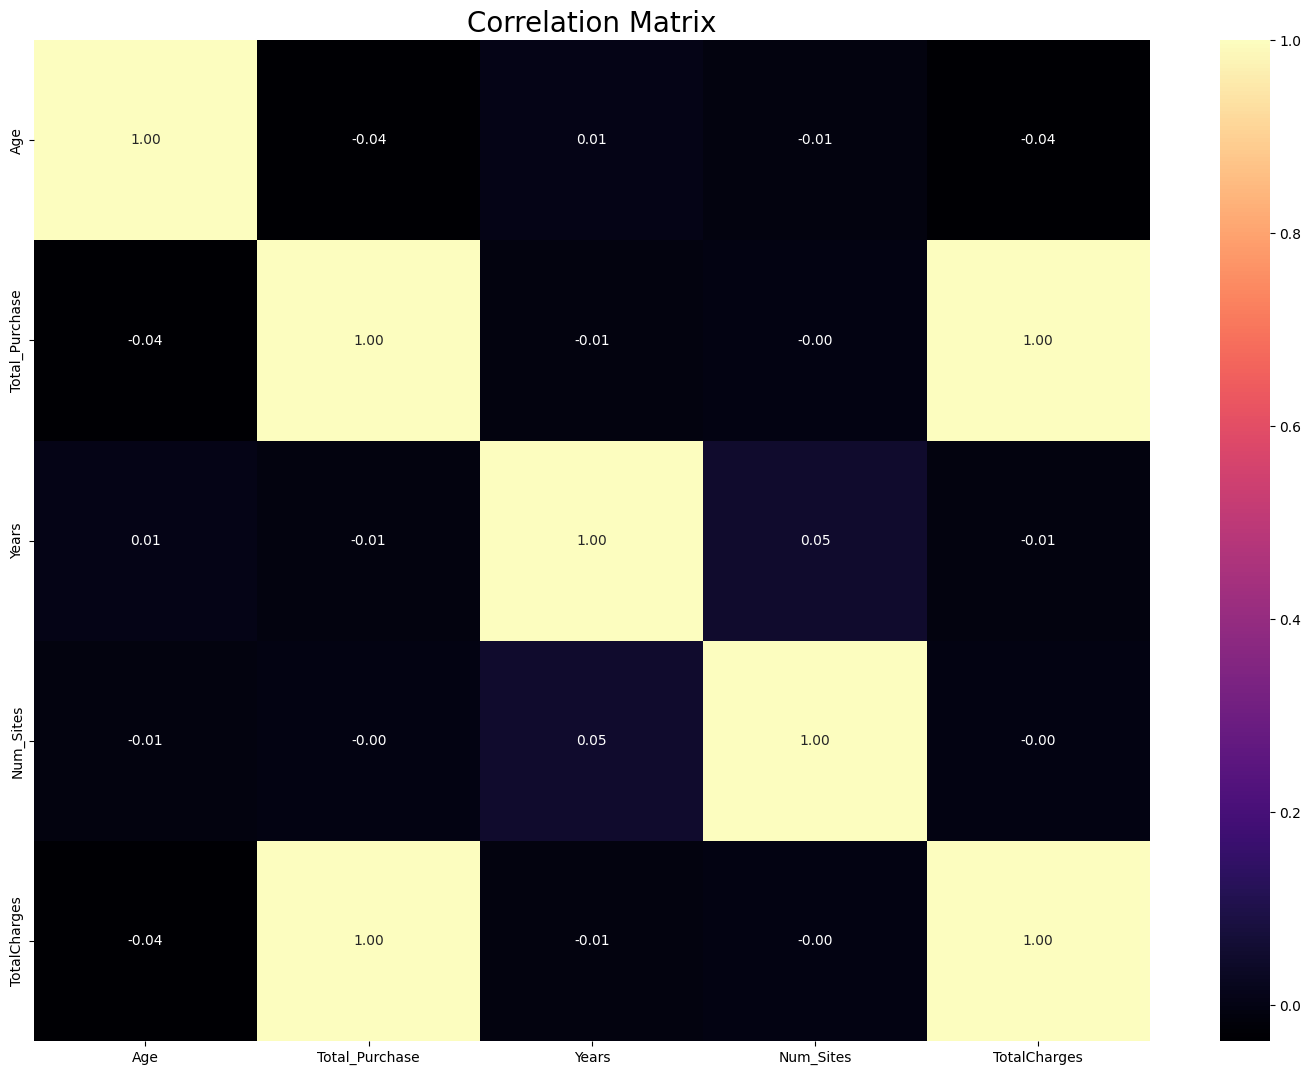

In [56]:
# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
#FEATURE ENGINEERING

In [ ]:
#eksik deger analizi

In [59]:
df.isnull().sum()

,0
Names,0
Age,0
Total_Purchase,0
Account_Manager,0
Years,0
Num_Sites,0
Churn,0
TotalCharges,0


In [58]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)  # aylık ödenecek miktarlarıyla totalcharge doldurulailir (daya iyi olur denensin)  veya 11 değişken drop edilebilir

df.isnull().sum()

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


,0
Names,0
Age,0
Total_Purchase,0
Account_Manager,0
Years,0
Num_Sites,0
Churn,0
TotalCharges,0


In [60]:
# BASE MODEL KURULUMU
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols

['Names']

In [76]:
print(dff.columns)

Index(['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites', 'Churn', 'TotalCharges', 'Names_Aaron Meyer', 'Names_Aaron West', 'Names_Abigail Gonzalez',
       ...
       'Names_William Perkins', 'Names_William Taylor', 'Names_Willie George II', 'Names_Willie Proctor', 'Names_Yolanda Jackson', 'Names_Yvette Perry',
       'Names_Zachary Howard', 'Names_Zachary Johnson', 'Names_Zachary Sanchez', 'Names_Zachary Walsh'],
      dtype='object', length=905)


In [73]:
y.value_counts()

,count
Churn,
0,900


In [88]:
print(cat_cols)


['Names']


In [89]:
cat_cols = [col for col in cat_cols if col in dff.columns]
print(cat_cols)

[]


In [90]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
dff = one_hot_encoder(dff, cat_cols, drop_first=True)

In [92]:
# Sadece mevcut sütunları çıkaralım
columns_to_drop = ["Churn"]
if "customerID" in dff.columns:
    columns_to_drop.append("customerID")

X = dff.drop(columns=columns_to_drop, axis=1)


In [94]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('SVM', SVC(gamma='auto', random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

In [98]:
# AYKIRI DEĞER ANALİZİ

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


In [99]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [100]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [101]:
# Aykırı Değer Analizi ve Baskılama İşlemi
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

Age False
Total_Purchase False
Years False
Num_Sites False
TotalCharges False


In [105]:
# Yıllık kategorik değişken oluşturma
df.loc[(df["Years"] >= 0) & (df["Years"] <= 1), "NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["Years"] > 1) & (df["Years"] <= 2), "NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["Years"] > 2) & (df["Years"] <= 3), "NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["Years"] > 3) & (df["Years"] <= 4), "NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["Years"] > 4) & (df["Years"] <= 5), "NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["Years"] > 5) & (df["Years"] <= 6), "NEW_TENURE_YEAR"] = "5-6 Year"
df["NEW_TENURE_YEAR"] = df["NEW_TENURE_YEAR"].fillna("Other")  # Veriye uymayanları 'Other' olarak atama


In [109]:
print(df.columns)


Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites', 'Churn', 'TotalCharges', 'NEW_TENURE_YEAR'], dtype='object')


In [110]:
# 'Contract' sütununun varlığı kontrolü
if 'Contract' in df.columns:
    df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year", "Two year"] else 0)

# 'OnlineBackup', 'DeviceProtection', 'TechSupport' sütunlarının varlığı kontrolü
if 'OnlineBackup' in df.columns and 'DeviceProtection' in df.columns and 'TechSupport' in df.columns:
    df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

# 'SeniorCitizen' sütununun varlığı kontrolü
if 'SeniorCitizen' in df.columns:
    df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

# 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' sütunlarının varlığı kontrolü
service_columns = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
if all(col in df.columns for col in service_columns):
    df['NEW_TotalServices'] = (df[service_columns] == 'Yes').sum(axis=1)

# 'StreamingTV', 'StreamingMovies' sütunlarının varlığı kontrolü
if 'StreamingTV' in df.columns and 'StreamingMovies' in df.columns:
    df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

# 'PaymentMethod' sütununun varlığı kontrolü
if 'PaymentMethod' in df.columns:
    df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)", "Credit card (automatic)"] else 0)

# 'TotalCharges' ve 'tenure' sütunlarının varlığı kontrolü
if 'TotalCharges' in df.columns and 'tenure' in df.columns:
    df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

# 'MonthlyCharges' ve 'NEW_AVG_Charges' sütunlarının varlığı kontrolü
if 'MonthlyCharges' in df.columns and 'NEW_AVG_Charges' in df.columns:
    df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

# 'MonthlyCharges' ve 'NEW_TotalServices' sütunlarının varlığı kontrolü
if 'MonthlyCharges' in df.columns and 'NEW_TotalServices' in df.columns:
    df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

# Veri setini kontrol etme
print(df.head())
print(df.shape)


              Names    Age  Total_Purchase  Account_Manager  Years  Num_Sites  Churn  TotalCharges NEW_TENURE_YEAR
0  Cameron Williams 42.000       11066.800                0  7.220      8.000      0     11066.800           Other
1     Kevin Mueller 41.000       11916.220                0  6.500     11.000      0     11916.220           Other
2       Eric Lozano 38.000       12884.750                0  6.670     12.000      0     12884.750           Other
3     Phillip White 42.000        8010.760                0  6.710     10.000      0      8010.760           Other
4    Cynthia Norton 37.000        9191.580                0  5.560      9.000      0      9191.580        5-6 Year
(900, 9)


In [111]:
# Değişkenlerin tiplerine göre ayrılması işlemi
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 900
Variables: 9
cat_cols: 2
num_cols: 5
cat_but_car: 1
num_but_cat: 2


In [112]:
# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [113]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

[]

In [114]:
for col in binary_cols:
    df = label_encoder(df, col)

In [115]:
# One-Hot Encoding İşlemi
# cat_cols listesinin güncelleme işlemi
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

['Names', 'NEW_TENURE_YEAR']

In [116]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,TotalCharges,Names_Aaron Meyer,Names_Aaron West,Names_Abigail Gonzalez,Names_Abigail Jennings,Names_Adam Gomez,Names_Adam Harris,Names_Adam Moore,Names_Adam Porter,Names_Adam Strong,Names_Adam Waters,Names_Adriana James,Names_Alan Gray,Names_Albert Clayton,Names_Alex Banks,Names_Alexandra Phillips,Names_Alexis Allen,Names_Alexis Hill,Names_Allison Clark DDS,Names_Alyssa Harper DDS,Names_Alyssa Pitts,Names_Amanda Barnett,Names_Amanda Brown,Names_Amanda Hernandez,Names_Amanda Moore,Names_Amanda Roberts,Names_Amanda Wade,Names_Amanda Williams,Names_Amber Carr,Names_Amber Evans,Names_Amber Hobbs,Names_Amber Martin,Names_Amber Spears,Names_Amber Williams,Names_Amy Baldwin,Names_Amy Garcia,Names_Amy Griffin,Names_Amy Henderson,Names_Amy Morris,Names_Amy Riddle,Names_Amy Stanley,Names_Ana Smith,Names_Andrea Ford,Names_Andrea George,Names_Andrea Ortiz,Names_Andrea Salas,Names_Andrea Warner,Names_Andrew Gates,Names_Andrew Hester,Names_Andrew Kent,Names_Andrew Leonard,Names_Andrew Moreno,Names_Andrew Young,Names_Angela Holloway,Names_Angela Ross,Names_Ann Johnson,Names_Ann White,Names_Anna Bryant,Names_Anna Wood,Names_Annette Taylor,Names_Anthony Green,Names_Anthony Hall,Names_Anthony Molina,Names_Anthony Mooney,Names_Anthony Vega,Names_April Freeman,Names_Ashlee Carr,Names_Ashley Jacobs,Names_Ashley Smith,Names_Ashley Soto,Names_Austin Branch,Names_Austin Hays,Names_Austin Melendez,Names_Austin Palmer,Names_Bailey Carroll,Names_Barbara Singleton,Names_Barbara Watkins,Names_Barry Gallagher,Names_Becky Cardenas,Names_Benjamin Davenport,Names_Benjamin Huff,Names_Benjamin Richard,Names_Beth Barnes,Names_Beth Fitzgerald,Names_Betty Bowers,Names_Beverly Hall,Names_Beverly Perry,Names_Billy Garner,Names_Bobby Christian,Names_Bradley Bennett,Names_Bradley Chambers,Names_Bradley Washington,Names_Brandi Bryan,Names_Brandon Ballard,Names_Brandon Compton,Names_Brandon Hunter,Names_Brandon Ortiz,Names_Brandon Wilson,Names_Brandy Martinez,Names_Brenda Fuentes,Names_Brenda Haley,Names_Brenda Hall,Names_Brenda Ruiz,Names_Brenda Walls,Names_Brendan Garcia,Names_Brendan Higgins,Names_Brett Allen MD,Names_Brian Hill,Names_Brian Love,Names_Brian Morse,Names_Brian Torres,Names_Brian White,Names_Brian Young,Names_Brianna White,Names_Brittany Green,Names_Brittany Hopkins,Names_Brittany Jackson,Names_Brittany Martinez,Names_Brittany Murphy,Names_Brittany Smith,Names_Brittany Walker,Names_Brittney Nichols,Names_Brittney Stokes,Names_Bruce Phillips,Names_Caitlin Johnston,Names_Calvin Coleman,Names_Cameron Brown,Names_Cameron Williams,Names_Carla Ball,Names_Carla Howell,Names_Carla Patterson,Names_Carla Wolfe,Names_Carlos Miller,Names_Carol Bush,Names_Carol Johnston,Names_Carol Young,Names_Carolyn Cabrera,Names_Carrie Williams,Names_Casey Hess,Names_Casey Mcdaniel,Names_Cassandra Proctor,Names_Catherine Johnston,Names_Catherine Lucas,Names_Catherine Martin,Names_Cathy Carney,Names_Charles Doyle,Names_Charles Ellison,Names_Charles Mcgrath,Names_Charles Schultz,Names_Charles Thompson,Names_Charles Whitney,Names_Chelsea Marsh,Names_Chelsea Ward,Names_Cheryl Bruce,Names_Cheryl Hayes,Names_Cheryl Hernandez,Names_Cheyenne Rogers,Names_Chris Sutton,Names_Christian Mann,Names_Christina Farmer,Names_Christina Lewis,Names_Christina Maldonado,Names_Christina Martin,Names_Christina Reed,Names_Christine Jenkins,Names_Christine Livingston,Names_Christopher Beasley,Names_Christopher Clark,Names_Christopher Daniels,Names_Christopher Johnson,Names_Christopher Martin,Names_Christopher Price,Names_Christopher Whitehead,Names_Christopher Yates,Names_Christy Hamilton,Names_Cindy Marshall,Names_Cindy Olson,Names_Claire Rivera,Names_Cody Middleton,Names_Cody Williams,Names_Colleen Morgan,Names_Colton Foster,Names_Connie Golden,Names_Connor Knapp,Names_Craig Garner,Names_Cristian Sanchez,Names_Crystal Mccullough,Names_Crystal Smith,Names_Curtis Phillips,Names_Curtis Robinson,Names_Cynthia Burns,Names_Cynthia Daniels,Names_Cynthi

In [ ]:
# MODELLEME

In [118]:
# 'customerID' sütununun veri setinde olup olmadığını kontrol etme
if 'customerID' in df.columns:
    X = df.drop(["Churn", "customerID"], axis=1)
else:
    X = df.drop(["Churn"], axis=1)

# Hedef değişkeni
y = df["Churn"]


In [119]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('SVM', SVC(gamma='auto', random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

In [128]:
# Özellikleri ve hedef değişkeni ayırma
X = df.drop("Churn", axis=1)  # Yalnızca 'Churn' sütununu düşür
y = df["Churn"]

# Eğitim ve test setine ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hedef değişkenin sınıflarını kontrol etme
print(f"Sınıflar: {y_train.value_counts()}")

# Eğer yalnızca bir sınıf varsa, bunu kontrol edip uygun şekilde işleyebiliriz.
if y_train.value_counts().shape[0] > 1:  # İki sınıf varsa
    # SMOTE ile veri dengesizliğini gidermek
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Logistic Regression modelini class_weight='balanced' ile kurma
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(class_weight='balanced', random_state=42)

    # Modeli 10 katlı çapraz doğrulama ile değerlendirme
    from sklearn.model_selection import cross_validate
    cv_results = cross_validate(model, X_train_res, y_train_res, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

    # Sonuçları yazdırma
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")
    print(f"ROC AUC: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
else:
    print("Yalnızca bir sınıf bulundu, SMOTE uygulanamaz.")



Sınıflar: Churn
0    630
Name: count, dtype: int64
Yalnızca bir sınıf bulundu, SMOTE uygulanamaz.


In [ ]:
# Random Forests

In [121]:
rf_model = RandomForestClassifier(random_state=17)

In [129]:
rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}

In [130]:
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [131]:
rf_best_grid.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [132]:
rf_best_grid.best_score_

1.0

In [133]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

In [134]:
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

In [135]:
cv_results['test_accuracy'].mean()

1.0

In [136]:
cv_results['test_f1'].mean()

0.0

In [137]:
cv_results['test_roc_auc'].mean()

nan

In [ ]:
# XGBoost

In [138]:
xgboost_model = XGBClassifier(random_state=17)

In [139]:
xgboost_params = {"learning_rate": [0.1, 0.01, 0.001],
                  "max_depth": [5, 8, 12, 15, 20],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.5, 0.7, 1]}

In [144]:
cv_results['test_accuracy'].mean()

1.0

In [145]:
cv_results['test_f1'].mean()

0.0

In [146]:
cv_results['test_roc_auc'].mean()

nan

In [ ]:
# LightGBM

In [147]:
lgbm_model = LGBMClassifier(random_state=17)

In [148]:

lgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}


In [149]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 900
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Wa

In [150]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 900
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

In [152]:
cv_results = cross_validate(lgbm_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 810
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 810, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

In [151]:
cv_results['test_accuracy'].mean()

1.0

In [153]:
cv_results['test_f1'].mean()

0.0

In [154]:
cv_results['test_roc_auc'].mean()

nan

In [ ]:
# CatBoost

In [155]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

In [156]:
catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}
